# 📌 Student Details
**Name:** Or K 
**ID:** 2657  

This notebook solves a classification task on the Wine dataset.
The goal is to predict the wine category based on chemical attributes using KNN.

### 🤖 Prompt/LLM Usage
This project was developed with the help of ChatGPT for technical assistance in Python, machine learning flow, and code refinement.


In [3]:
import pandas as pd  # Import necessary library
import matplotlib.pyplot as plt  # Import necessary library
import seaborn as sns  # Import necessary library
import numpy as np  # Import necessary library
from sklearn.model_selection import train_test_split, GridSearchCV  # Import necessary library
from sklearn.preprocessing import StandardScaler  # Import necessary library
from sklearn.neighbors import KNeighborsClassifier  # Import necessary library
from sklearn.metrics import classification_report, confusion_matrix  # Import necessary library
from sklearn.decomposition import PCA  # Import necessary library

In [4]:
# Load the training and test datasets
train_df = pd.read_csv('wine_train.csv')  # Load the dataset from a CSV file
test_df = pd.read_csv('wine_test.csv')  # Load the dataset from a CSV file
train_df = train_df.drop_duplicates()

In [5]:
features = [col for col in train_df.columns if col != 'target']

X = train_df[features]
y = train_df['target']
X_test = test_df[features]
y_test = test_df['target']

In [6]:
scaler = StandardScaler()  # Apply standard scaling to the features
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(  # Split the dataset into training and validation sets
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)  # Train the model
best_model = grid.best_estimator_

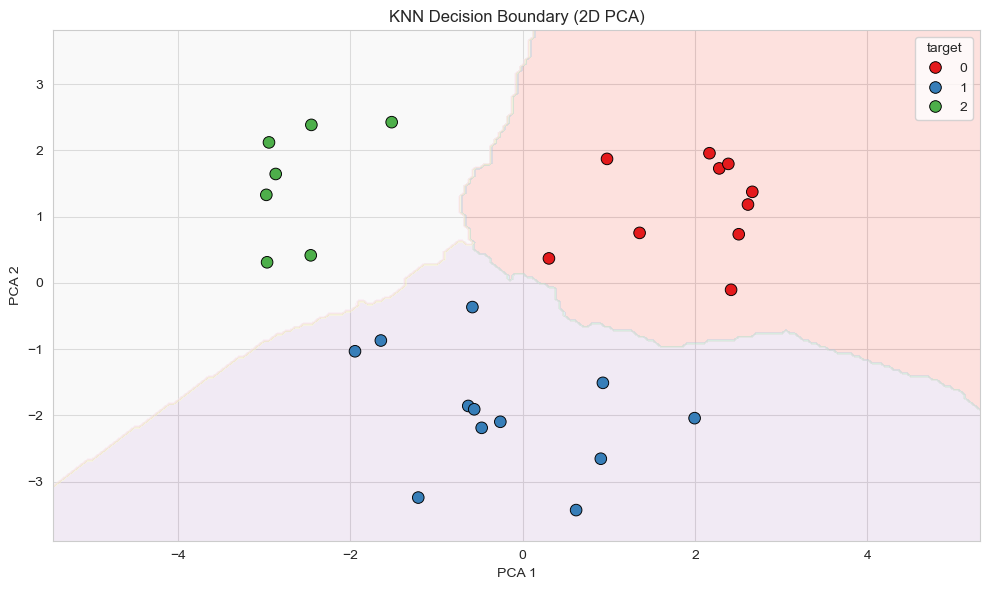

In [9]:
# Reduce to 2D and retrain
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_val_2d = pca.transform(X_val)
knn_2d = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
knn_2d.fit(X_train_2d, y_train)  # Train the model

# Mesh for decision boundary
h = 0.05
xx, yy = np.meshgrid(
    np.arange(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, h),
    np.arange(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, h)
)
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Make predictions on the validation/test set

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel1")
sns.scatterplot(x=X_val_2d[:, 0], y=X_val_2d[:, 1], hue=y_val, palette="Set1", edgecolor="k", s=70)
plt.title("KNN Decision Boundary (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [10]:
y_val_pred = best_model.predict(X_val)  # Make predictions on the validation/test set
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))  # Print classification report with precision, recall, F1-score
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))  # Display the confusion matrix

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Validation Confusion Matrix:
[[10  0  0]
 [ 0 11  1]
 [ 0  0  7]]


In [11]:
y_test_pred = best_model.predict(X_test_scaled)  # Make predictions on the validation/test set
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))  # Print classification report with precision, recall, F1-score

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92        14
           2       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [12]:
# GridSearchCV results summary
pd.DataFrame(grid.cv_results_)[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
0,3,0.949019,3
1,5,0.939212,4
2,7,0.956184,1
3,9,0.956184,1


###  Additional Models:

In [14]:
### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier  # Import necessary library
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # Train the model
y_val_tree_pred = tree.predict(X_val)  # Make predictions on the validation/test set
print('Validation Report – Decision Tree')
print(classification_report(y_val, y_val_tree_pred))  # Print classification report with precision, recall, F1-score

Validation Report – Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      0.83      0.87        12
           2       0.78      1.00      0.88         7

    accuracy                           0.90        29
   macro avg       0.90      0.91      0.90        29
weighted avg       0.91      0.90      0.90        29



In [16]:
# First 5 predictions on test set
y_test_pred[:5]

array([2, 0, 2, 1, 2], dtype=int64)

In [17]:
### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression  # Import necessary library
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)  # Train the model
y_val_logreg = logreg.predict(X_val)  # Make predictions on the validation/test set
print("Validation Report – Logistic Regression")
print(classification_report(y_val, y_val_logreg))  # Print classification report with precision, recall, F1-score
print("Confusion Matrix – Logistic Regression")
print(confusion_matrix(y_val, y_val_logreg))  # Display the confusion matrix

Validation Report – Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29

Confusion Matrix – Logistic Regression
[[10  0  0]
 [ 0 11  1]
 [ 0  0  7]]
